In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd "drive/My Drive/Internship/"

/content/drive/My Drive/Internship


In [ ]:
ls

 MSFT1.csv   msft.us.txt           'Sentiment Analysis.ipynb'  'TCS SA.ipynb'
 MSFT.csv    NSE-TATAGLOBAL11.csv   TCS.NS.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

%matplotlib inline

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-09,136.000000,136.970001,135.800003,136.460007,134.801239,19953100
1,2019-07-10,137.130005,138.580002,137.020004,137.850006,136.174347,24204400
2,2019-07-11,138.199997,139.220001,137.869995,138.399994,136.717636,22327900
3,2019-07-12,138.850006,139.130005,138.009995,138.899994,137.211563,18936800
4,2019-07-15,139.440002,139.539993,138.460007,138.899994,137.211563,16651500
...,...,...,...,...,...,...,...
248,2020-07-01,203.139999,206.350006,201.770004,204.699997,204.699997,32061200
249,2020-07-02,205.679993,208.020004,205.000000,206.259995,206.259995,29315800
250,2020-07-06,208.830002,211.130005,208.089996,210.699997,210.699997,31897600
251,2020-07-07,210.449997,214.669998,207.990005,208.250000,208.250000,33600700


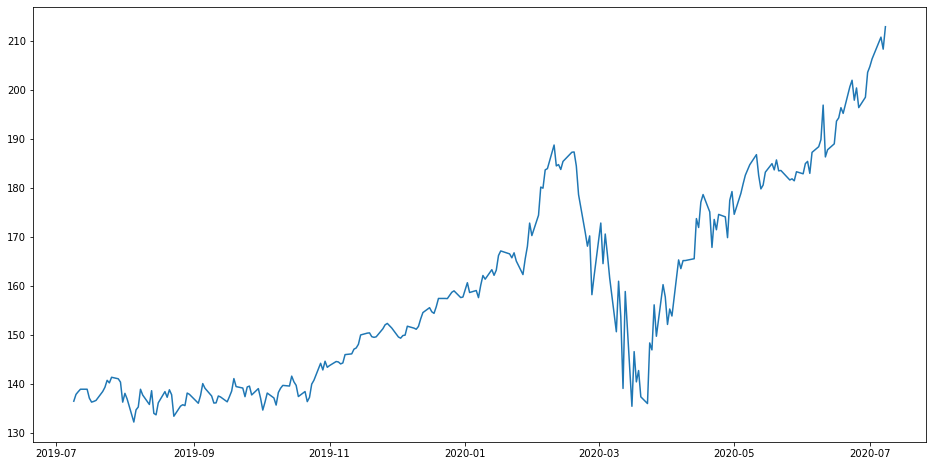

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [ ]:
df = df[['Close']] 
# Take a look at the new data 
print(df.head())


                 Close
Date                  
2019-07-09  136.460007
2019-07-10  137.850006
2019-07-11  138.399994
2019-07-12  138.899994
2019-07-15  138.899994


In [ ]:
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-forecast_out)
#print the new data set
print(df.tail())


                 Close  Prediction
Date                              
2020-07-01  204.699997         NaN
2020-07-02  206.259995         NaN
2020-07-06  210.699997         NaN
2020-07-07  208.250000         NaN
2020-07-08  212.830002         NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)


[[136.460007]
 [137.850006]
 [138.399994]
 [138.899994]
 [138.899994]
 [137.080002]
 [136.270004]
 [136.419998]
 [136.619995]
 [138.429993]
 [139.289993]
 [140.720001]
 [140.190002]
 [141.339996]
 [141.029999]
 [140.350006]
 [136.270004]
 [138.059998]
 [136.899994]
 [132.210007]
 [134.690002]
 [135.279999]
 [138.889999]
 [137.710007]
 [135.789993]
 [138.600006]
 [133.979996]
 [133.679993]
 [136.130005]
 [138.410004]
 [137.259995]
 [138.789993]
 [137.779999]
 [133.389999]
 [135.449997]
 [135.740005]
 [135.559998]
 [138.119995]
 [137.860001]
 [136.039993]
 [137.630005]
 [140.050003]
 [139.100006]
 [137.520004]
 [136.080002]
 [136.119995]
 [137.520004]
 [137.320007]
 [136.330002]
 [137.389999]
 [138.520004]
 [141.070007]
 [139.440002]
 [139.139999]
 [137.380005]
 [139.360001]
 [139.539993]
 [137.729996]
 [139.029999]
 [137.070007]
 [134.649994]
 [136.279999]
 [138.119995]
 [137.119995]
 [135.669998]
 [138.240005]
 [139.100006]
 [139.679993]
 [139.550003]
 [141.570007]
 [140.410004]
 [139.

In [ ]:
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)


[137.259995 138.789993 137.779999 133.389999 135.449997 135.740005
 135.559998 138.119995 137.860001 136.039993 137.630005 140.050003
 139.100006 137.520004 136.080002 136.119995 137.520004 137.320007
 136.330002 137.389999 138.520004 141.070007 139.440002 139.139999
 137.380005 139.360001 139.539993 137.729996 139.029999 137.070007
 134.649994 136.279999 138.119995 137.119995 135.669998 138.240005
 139.100006 139.679993 139.550003 141.570007 140.410004 139.690002
 137.410004 138.429993 136.369995 137.240005 139.940002 140.729996
 144.190002 142.830002 144.610001 143.369995 143.720001 144.550003
 144.460007 144.059998 144.259995 145.960007 146.110001 147.070007
 147.309998 148.059998 149.970001 150.339996 150.389999 149.619995
 149.479996 149.589996 151.229996 152.029999 152.320007 151.380005
 149.550003 149.309998 149.850006 149.929993 151.75     151.360001
 151.130005 151.699997 153.240005 154.529999 155.529999 154.690002
 154.369995 155.710007 157.410004 157.410004 157.380005 158.66

In [ ]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)


svm confidence:  0.18760127262950077


In [ ]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)


lr confidence:  0.4073009977747701


In [ ]:
# Set x_forecast equal to the last 30 rows of the original data set from Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)


[[181.809998]
 [181.399994]
 [183.25    ]
 [182.830002]
 [184.910004]
 [185.360001]
 [182.919998]
 [187.199997]
 [188.360001]
 [189.800003]
 [196.839996]
 [186.270004]
 [187.740005]
 [188.940002]
 [193.570007]
 [194.240005]
 [196.320007]
 [195.149994]
 [200.570007]
 [201.910004]
 [197.839996]
 [200.339996]
 [196.330002]
 [198.440002]
 [203.509995]
 [204.699997]
 [206.259995]
 [210.699997]
 [208.25    ]
 [212.830002]]


In [ ]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)


[183.89755272 183.57052771 185.04611879 184.71112241 186.37016158
 186.72908558 184.7829045  188.19669255 189.12192823 190.27049429
 195.88569279 187.45491691 188.6274106  189.58454527 193.27750308
 193.81190301 195.47094217 194.53772317 198.86080258 199.92960324
 196.683307   198.67734254 195.47891432 197.16188032 201.20577881
 202.15494132 203.3992179  206.94062661 204.98647418 208.63954888]
[200.89133171 199.2817033  185.3136703  193.63247653 145.71188021
 140.7375937  192.08744849 151.4234684  158.82793067 158.4924508
 163.84187805 142.09986455 156.03029487 159.31219812 162.90079824
 163.39998025 163.8284996  163.71351056 163.85099808 163.85100058
 163.84963876 163.85099602 163.82887425 163.85060818 163.85100065
 163.85100065 163.85100065 163.85100065 163.85100065 163.85100065]


In [ ]:
df1 = pd.DataFrame({'Actual': x_forecast.flatten(), 'Predicted': lr_prediction.flatten()})
df1

,Actual,Predicted
0,181.809998,183.897553
1,181.399994,183.570528
2,183.250000,185.046119
3,182.830002,184.711122
4,184.910004,186.370162
5,185.360001,186.729086
6,182.919998,184.782905
7,187.199997,188.196693
8,188.360001,189.121928
9,189.800003,190.270494


Text(0, 0.5, 'Stock Prices')

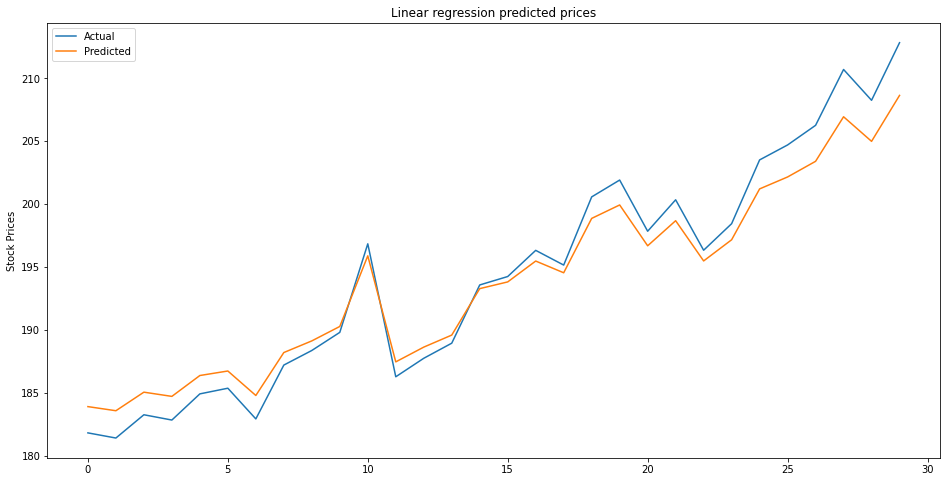

In [ ]:

ax = df1.plot(title='Linear regression predicted prices', figsize=(16, 8))#predicted value
ax.set_ylabel("Stock Prices")

#fig = x_forecast.plot(ax = ax).get_figure()#actual value


In [ ]:
# report performance
mse = mean_squared_error(x_forecast, lr_prediction)
print('MSE: '+str(mse))
mae = mean_absolute_error(x_forecast, lr_prediction)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(x_forecast,lr_prediction))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(lr_prediction - x_forecast)/np.abs(lr_prediction))
print('MAPE: '+str(mape))


MSE: 3.520199046168502
MAE: 1.6090417415603449
RMSE: 1.876219349161633
MAPE: 0.048307140836759736
